In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob


In [18]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
sns.set_context("poster")


In [19]:
path = "results/linear_multi"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_1.csv', 'results/linear_multi\\linear_dgp_10.csv', 'results/linear_multi\\linear_dgp_12.csv', 'results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_16.csv', 'results/linear_multi\\linear_dgp_17.csv', 'results/linear_multi\\linear_dgp_18.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_2.csv', 'results/linear_multi\\linear_dgp_20.csv', 'results/linear_multi\\linear_dgp_21.csv', 'results/linear_multi\\linear_dgp_22.csv', 'results/linear_multi\\linear_dgp_23.csv', 'results/linear_multi\\linear_dgp_24.csv', 'results/linear_multi\\linear_dgp_25.csv', 'results/linear_multi\\linear_dgp_26.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_28.csv', 'results/linear_multi\\linear_dgp_29.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/linear_multi\\linear_dgp_30.csv', 'results/line

In [33]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx       mean     median       true          bias          std  \
0      1.0  1.6190001  1.6190001      1.613         0.006  0.036000002   
1      1.0  1.6190001  1.6190001      1.613         0.006  0.036000002   
2      1.0      1.646  1.6450001  1.6650001  -0.019000001  0.038000003   
3      1.0  1.6350001      1.636  1.6650001  -0.030000001        0.039   
4      1.0  1.8260001  1.8260001      1.613    0.21300001        0.054   
..     ...        ...        ...        ...           ...          ...   
195  306.0       1.48       1.48       1.51         -0.03        0.051   
196  306.0      1.811      1.811      1.776         0.035        0.044   
197  306.0      1.813      1.814      1.776         0.037        0.047   
198  306.0      1.558      1.558       1.51         0.048        0.044   
199  306.0      1.544      1.544       1.51         0.034        0.047   

            RMSE       q025       q975 covering           method estimand  \
0    0.036000002  1.5500001  1.689

In [34]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [35]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [60]:
def coverage_perc(x):
    return np.mean(x)*100

df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean','median'],
                                         'bias' : ['mean','median'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean','median'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean','median'],
                                         'covering' : [coverage_perc]}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


estimand   model    type      mean    median       std              bias  \
                                 mean      mean      mean  median      mean   
0   dynamic      GP      1S  1.780765  1.779597  0.046399  0.0440  0.026895   
1   dynamic      GP      2S  1.747714  1.748399  0.066328  0.0520 -0.006155   
2   dynamic      GP      3S  1.753550  1.752105  0.070261  0.0540 -0.000319   
3   dynamic      GP    Obs.  2.039303  2.043181  0.080903  0.0620  0.285433   
4   dynamic      GP  Oracle  1.748966  1.757109  0.051950  0.0380 -0.004903   
5   dynamic  Linear      1S  1.781971  1.781908  0.043672  0.0440  0.028101   
6   dynamic  Linear      2S  1.759399  1.759315  0.052387  0.0530  0.005529   
7   dynamic  Linear      3S  1.760466  1.760160  0.055378  0.0555  0.006597   
8   dynamic  Linear    Obs.  2.052122  2.052097  0.059798  0.0590  0.298252   
9   dynamic  Linear  Oracle  1.761051  1.761055  0.037571  0.0380  0.007181   
10    stoch      GP      1S  1.576013  1.574916  0.052529  0.0490  0.015147   
11    stoch      GP      2S  1.466693  1.467504  0.066324  0.0515 -0.094172   
12    stoch      GP      3S  1.470782  1.469635  0.068651  0.0530 -0.090084   
13    stoch      GP    Obs.  1.576975  1.579714  0.070076  0.0550  0.016109   
14    stoch      GP  Oracle  1.547555  1.555630  0.053134  0.0380 -0.013311   
15    stoch  Linear      1S  1.580445  1.580487  0.045437  0.0450  0.019580   
16    stoch  Linear      2S  1.502164  1.502105  0.051303  0.0510 -0.058702   
17    stoch  Linear      3S  1.502206  1.501908  0.053071  0.0530 -0.058660   
18    stoch  Linear    Obs.  1.583118  1.583097  0.051958  0.0520  0.022252   
19    stoch  Linear  Oracle  1.560752  1.560765  0.037824  0.0380 -0.000113   

                true      RMSE              q025      q975 ci_length          \
    median      mean      mean  median      mean      mean      mean  median   
0   0.0420  1.753870  0.071437  0.0640  1.692504  1.871114  0.178609  0.1740   
1   0.0305  1.753870  0.098483  0.0675  1.627941  1.867677  0.239735  0.2030   
2   0.0300  1.753870  0.098004  0.0700  1.622571  1.873777  0.251206  0.2095   
3   0.2990  1.753870  0.313038  0.3040  1.883303  2.179252  0.295950  0.2450   
4   0.0030  1.753870  0.058798  0.0400  1.649282  1.831756  0.182475  0.1490   
5   0.0470  1.753870  0.070378  0.0680  1.696382  1.867508  0.171126  0.1720   
6   0.0240  1.753870  0.072496  0.0630  1.657126  1.862282  0.205155  0.2060   
7   0.0250  1.753870  0.075042  0.0665  1.652924  1.869950  0.217025  0.2180   
8   0.3200  1.753870  0.304836  0.3250  1.934874  2.169403  0.234529  0.2305   
9   0.0060  1.753870  0.042584  0.0410  1.687370  1.834668  0.147298  0.1480   
10  0.0330  1.560866  0.078202  0.0655  1.475807  1.678840  0.203034  0.1925   
11 -0.0570  1.560866  0.121357  0.0780  1.346500  1.587160  0.240660  0.2020   
12 -0.0580  1.560866  0.119756  0.0800  1.342458  1.589698  0.247240  0.2060   
13  0.0430  1.560866  0.103849  0.0770  1.443609  1.697971  0.254361  0.2150   
14 -0.0060  1.560866  0.066870  0.0480  1.445626  1.632878  0.187252  0.1510   
15  0.0290  1.560866  0.069080  0.0650  1.491580  1.669542  0.177962  0.1770   
16 -0.0435  1.560866  0.085366  0.0690  1.401933  1.602891  0.200958  0.2000   
17 -0.0430  1.560866  0.086718  0.0700  1.399063  1.606983  0.207920  0.2060   
18  0.0500  1.560866  0.083466  0.0770  1.481143  1.684933  0.203790  0.2040   
19 -0.0080  1.560866  0.045517  0.0430  1.486651  1.634786  0.148134  0.1470   

        covering  
   coverage_perc  
0      84.873950  
1      93.697479  
2      93.697479  
3       7.563025  
4     100.000000  
5      89.915966  
6      93.697479  
7      93.697479  
8       0.000000  
9     100.000000  
10     84.873950  
11     67.226891  
12     68.067227  
13     86.974790  
14    100.000000  
15     91.176471  
16     82.352941  
17     82.352941  
18     86.554622  
19    100.000000

Text(0, 0.5, '')

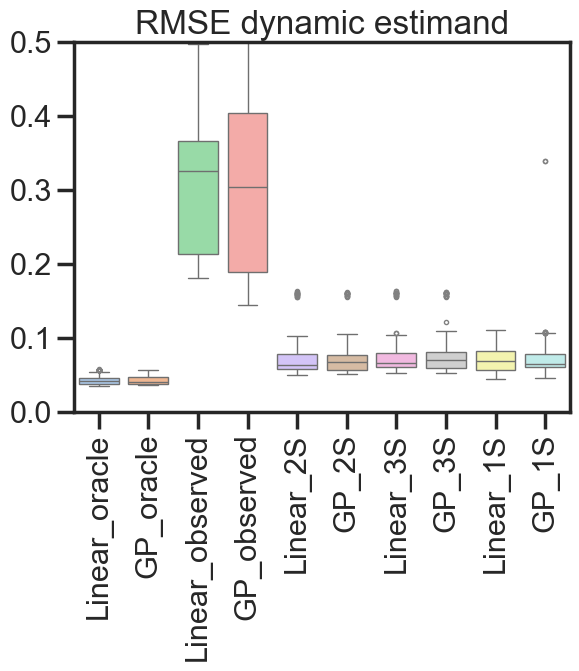

In [45]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

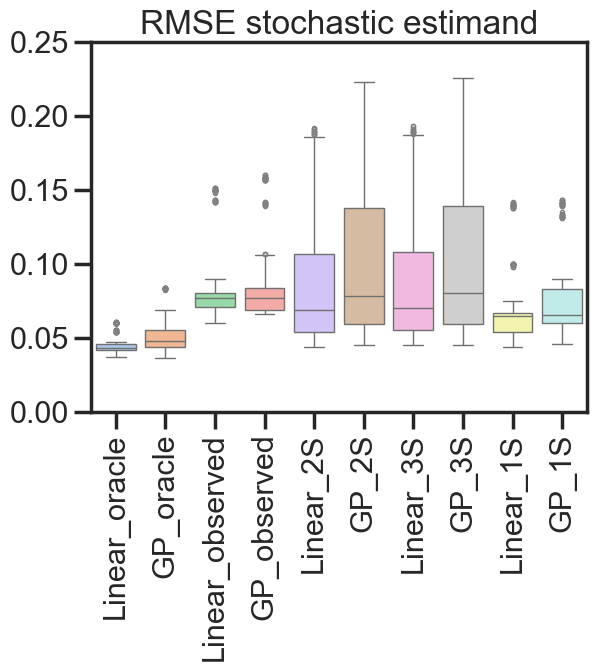

In [49]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

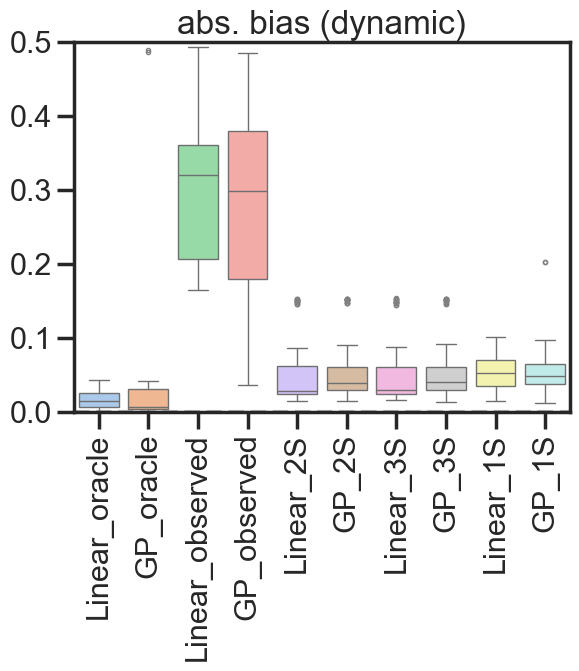

In [50]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

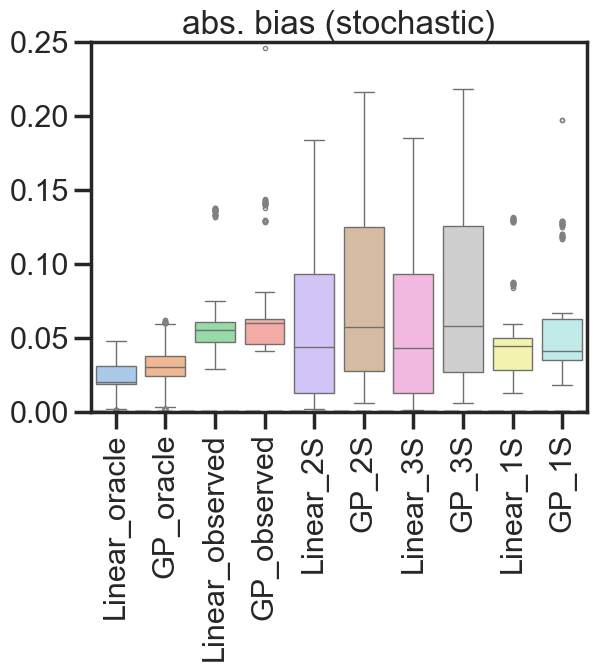

In [53]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

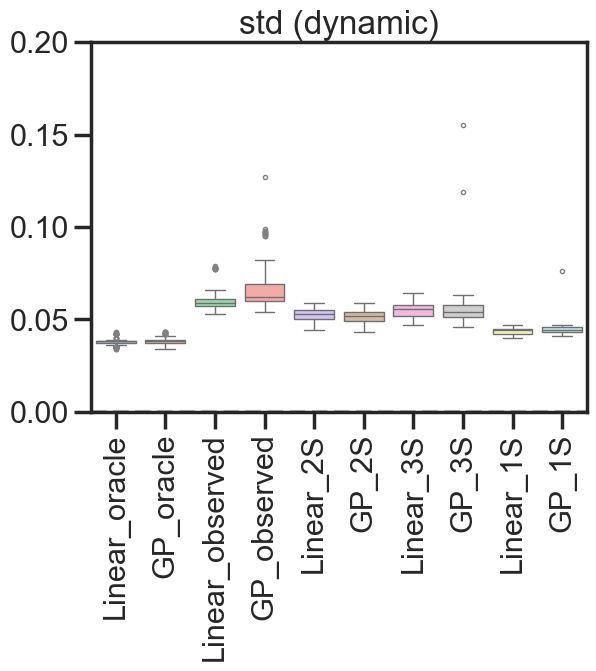

In [54]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

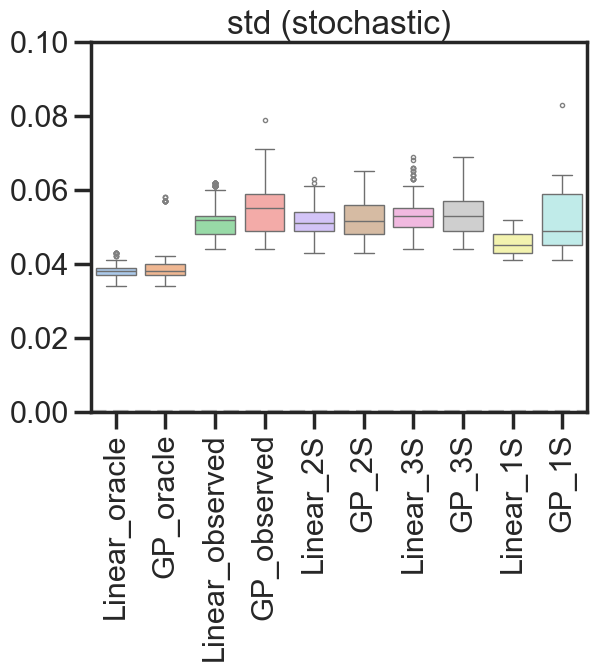

In [58]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [ ]:
# c95_text = ['{:.2f}%'.format(num) for num in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
# c95_text = [f"{p:.1f}%" for p in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
method_names = combined_df["method"].unique()
c95_max = combined_df.groupby('method').agg({'CI_length95': ['max']}).reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])[('CI_length95', 'max')]
c95_max = [val for val in c95_max]
print(c95_max)

In [ ]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_ci95 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops)
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 


In [ ]:
box_ci99 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length99',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])
box_ci99.set_title("Length of 99% CI distribution")

In [ ]:
fig, axes = plt.subplots(1, 2)

flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_rmse = sns.boxplot(data=combined_df, x = 'type', y = 'RMSE',
               order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                       hue = "type", palette = 'pastel',
                       flierprops=flierprops,
                       ax=axes[0])
box_rmse.set_title("RMSE")
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

box_ci95 = sns.boxplot(data=combined_df, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops,
                       ax=axes[1])
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 
fig = plt.gcf()
fig.set_size_inches(16.5, 6)
fig.savefig('Sim_RMSE_CI_plot.png', dpi=300)
 